### Search

In [1]:
# using built-in library
import bisect
A = [-14, -10, 2, 108, 243, 285, 401]
bisect.bisect_left(A,108), bisect.bisect_right(A,108)

(3, 4)

In [34]:
def bsearch(t, A):
    L, U = 0, len(A)-1
    while L <= U:
        M = L + (U-L)/2
        if A[M] == t:
            return M
        elif A[M] < t:
            L = M + 1
        else: 
            U = M - 1
    return -1

A = [-14, -10, 2, 108, 243, 285, 401]
bsearch(108, A)           

3

In [33]:
# 11.1 Search a sorted array for the first ocuurance of k
# Naive Approach
# O(logn) + O(n)
def first_occur(k, A):
    '''
    takes a sorted array and a key and returns the index of 
    the first occurrence of that key in the array.
    
    first_occur(108, A) = 3
    first_occur(285, A) = 6
    '''
    L, U = 0, len(A) - 1
    while L <= U:
        M = (L + U) // 2
        if A[M] < k:
            L = M + 1
        elif A[M] > k:
            U = M - 1
        else:
            while A[M]==k:
                M -= 1
            return M+1          
    return -1

A = [-14, -10, 2, 108, 108, 243, 285, 285, 285, 401]
print first_occur(108, A)
print first_occur(285, A)

3
6


In [35]:
# bsearch based approach
# O(logn)
def first_occur(k, A):
    '''
    takes a sorted array and a key and returns the index of 
    the first occurrence of that key in the array.
    
    first_occur(108, A) = 3
    first_occur(285, A) = 6
    '''
    left, right, result  = 0, len(A)-1, -1
    while left <= right:
        mid = (left + right) // 2
        if A[mid] > k:
            right = mid - 1
        elif A[mid]==k:
            result = mid
            right = mid - 1
        else: # A[M] < k
            left = mid + 1
    return result

A = [-14, -10, 2, 108, 108, 243, 285, 285, 285, 401]
print first_occur(108, A)
print first_occur(285, A)

3
6


In [41]:
# 11.1. Variant 1
def first_occur_greater(k, A):
    
    '''
     takes a sorted array and a key, and finds the index of 
     the first occurrence of an element greater than that key.
     
     first_occur_greater(285, A) = 9
     first_occur_greater(-14, A) = 1
    '''
    
    L, U = 0, len(A)-1
    out = -1
    while L <= U:
        M = (L + U) // 2
        if A[M] < k:
            L = M + 1
        elif A[M] > k:
            U = M - 1
        elif A[M] == k:
            L = M + 1
            out = L
    return out

print first_occur_greater(285, A)
print first_occur_greater(-14, A)

9
1


**11.1. Variant 2 **Let A be an unsorted array of n integers, with A[0] ≥ A[1] and A[n − 2] ≤ A[n − 1]. Call an index i a local minimum if A[i] is less than or equal to its neighbors. How would you efficiently find a local minimum, if one exists?

In [22]:
B = [100, 55, -14, -10, 2, 108, 108, 243, 285, 285, 285, 401]

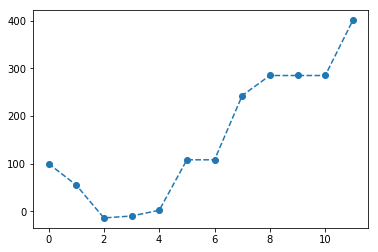

In [32]:
from matplotlib import pyplot as plt
% matplotlib inline

ax = plt.plot(B,'o--')

In [ ]:
def local_min(A):
    
    '''
    find a local minimum
    
    local_min(A) = 2
    '''
    
    

Variant: Write a program which takes a sorted array A of integers, and an integer k, and returns the interval enclosing k, i.e., the pair of integers L and U such that L is the first occurrence of k in A and U is the last occurrence of k in A. If k does not appear in A, return [−1, −1]. For example if A = ⟨1,2,2,4,4,4,7,11,11,13⟩ and k = 11, you should return [7,8].

In [6]:
def first_occur_smaller(k, A):
    
    '''
     takes a sorted array and a key, and finds the index of 
     the first occurrence of an element greater than that key.
     
     A = [-14, -10, 2, 108, 108, 243, 285, 285, 285, 401]
     
     first_occur_greater(285, A) = 6
     first_occur_greater(401, A) = 8
    '''
    
    L, U = 0, len(A) - 1
    out = -1
    while L <= U:
        M = (L + U) // 2
        if A[M] < k:
            L = M + 1
        elif A[M] > k:
            U = M - 1
        elif A[M] == k:
            U = M - 1
            out = L
    return out

print first_occur_smaller(285, A)
print first_occur_smaller(401, A)

6
9


In [1]:
def interval_enclosing(k, A):
    
    '''
     takes a sorted array A of integers, and an integer k, 
     and returns the interval enclosing k.
     
     A = [1,2,2,4,4,4,7,11,11,13]
     
     interval_enclosing(6, A) = [-1, -1]
     interval_enclosing(11, A) = [7, 8]
    '''
    
    L1, U1 = 0, len(A) - 1
    L2, U2 = 0, len(A) - 1
    out1, out2 = -1, -1
    while L <= U:
        M = (L + U) // 2
        if A[M] < k:
            L = M + 1
        elif A[M] > k:
            U = M - 1
        elif A[M] == k:
            L = M + 1
            U = M + 1
            out1 = L
            out2 = L
    return [out1, out2]

A = [1,2,2,4,4,4,7,11,11,13]

print interval_enclosing(6, A)
print interval_enclosing(11, A)

[-1, -1]
[9, 9]


Variant: Write a program which tests if p is a prefix of a string in an array of sorted strings.

In [43]:
# 11.3 search a cyclic sorted array
# time complexity is O(logn)
def search_smallest(A):
    left, right = 0, len(A)-1
    while left < right:
        mid = (left + right)//2
        if A[mid] > A[right]:
            left = mid+1
        else: # A[mid] < A[right]
            right = mid
    return left

A = [378, 478, 550, 631, 103, 203, 220, 234, 279, 368]
search_smallest(A)
# this problem cannot be solved in lass than O(n) when elements may be repeated.
# e.g. A = [1, 1, 1, 1, 0]

4

In [2]:
# 11.4 integer square root 
# time complexity O(logk)
def square_root(k):
    left, right = 0, k
    while left <= right:
        mid = (left + right)//2
        mid_squared = mid * mid
        if mid_squared <= k:
            left = mid + 1
        else:
            right = mid - 1
    return left - 1

square_root(41)

6

In [30]:
def sub_sum(arr, n, s):
    for i in range(n):
        current_sum = arr[i]
        j = i+1
        while j <= n:
            if current_sum == s:
                print ('sum found btw')
                print ('indecis {} and {}'.format(i+1, j))
                
                return 1
                
            elif current_sum > s or j==n:
                break
            current_sum += arr[j]
            j+=1
            
    print ('no subarray found')
    return 0
    
ntc = input()
ns, target, array = {}, {}, {}
for i in range(int(ntc)):
    ls = list(map(int, input().strip().split(' ')))
    ns[i], target[i] = ls[0], ls[1]
    array[i] = list(map(int,input().strip().split(' ')))
    
for i in range(int(ntc)):
    sub_sum(array[i], ns[i], target[i])

2
5 12
1 2 3 7 5
10 15
1 2 3 4 5 6 7 8 9 10
sum found btw
indecis 2 and 4
sum found btw
indecis 1 and 5


In [1]:
# Python program to for tree traversals
 
# A class that represents an individual node in a
# Binary Tree
class Node:
    def __init__(self,key):
        self.left = None
        self.right = None
        self.val = key
 
 
# A function to do inorder tree traversal
def printInorder(root):
 
    if root:
 
        # First recur on left child
        printInorder(root.left),
 
        # then print the data of node
        print(root.val),
 
        # now recur on right child
        printInorder(root.right)
 
 
# A function to do postorder tree traversal
def printPostorder(root):
 
    if root:
 
        # First recur on left child
        printPostorder(root.left)
 
        # the recur on right child
        printPostorder(root.right)
 
        # now print the data of node
        print(root.val),
 
 
# A function to do postorder tree traversal
def printPreorder(root):
 
    if root:
 
        # First print the data of node
        print(root.val),
 
        # Then recur on left child
        printPreorder(root.left)
 
        # Finally recur on right child
        printPreorder(root.right)
 
 
# Driver code
root = Node(1)
root.left      = Node(2)
root.right     = Node(3)
root.left.left  = Node(4)
root.left.right  = Node(5)
print ("Preorder traversal of binary tree is")
printPreorder(root)
 
print ("\nInorder traversal of binary tree is")
printInorder(root)
 
print ("\nPostorder traversal of binary tree is")
printPostorder(root)

Preorder traversal of binary tree is
1 2 4 5 3 
Inorder traversal of binary tree is
4 2 5 1 3 
Postorder traversal of binary tree is
4 5 2 3 1
